## Gender Classifier

### Importing important libraries

In [27]:
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os

### Connecting google drive with colab

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
base_dir = "/content/drive/My Drive/Colab Notebooks/Gender Classifier/"

In [6]:
!ls "/content/drive/My Drive/Colab Notebooks/Gender Classifier/"

Dataset  Gender_classifier.ipynb


### Initialization of parameters

In [7]:
epochs = 20
lr = 1e-3
batch_size = 64

### Storing images into data list while their labels into labels list

In [11]:
# storing image data and their names in two different lists data and labels respectively
data = []
labels = []
DIRECTORY = "/content/drive/My Drive/Colab Notebooks/Gender Classifier/Dataset/"
CATEGORIES = ["man","woman"]
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(96, 96))
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	data.append(image)
    	labels.append(category)


## Coverting categorical labels into binary form

In [14]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

## Converting list of data into array 

In [15]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

## Splitting dataset into training and testing dataset

In [17]:
trainX, testX, trainY, testY = train_test_split(data, labels,	test_size=0.20, stratify=labels, random_state=42)

### Creating imagedatagenerator to increase the number of dataset by changing some image parameters

In [16]:
aug = ImageDataGenerator(
                        rotation_range=20,
                        zoom_range=0.15,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        shear_range=0.15,
                        horizontal_flip=True,
                        fill_mode="nearest"
                        )


## Designing CNN model for the application

In [18]:
model = Sequential()
    
model.add(Conv2D(32, (3,3), padding="same", input_shape=(96, 96, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation("softmax"))

## Compiling the model

In [19]:
opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [20]:
H = model.fit_generator(
                        aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
28/28 [==============================] - 47s 2s/step - loss: 0.7131 - accuracy: 0.4874 - val_loss: 0.6930 - val_accuracy: 0.4913
Epoch 2/20
28/28 [==============================] - 46s 2s/step - loss: 0.6570 - accuracy: 0.6008 - val_loss: 0.5420 - val_accuracy: 0.7511
Epoch 3/20
28/28 [==============================] - 46s 2s/step - loss: 0.5850 - accuracy: 0.6805 - val_loss: 0.5081 - val_accuracy: 0.7359
Epoch 4/20
28/28 [==============================] - 45s 2s/step - loss: 0.5573 - accuracy: 0.7131 - val_loss: 0.5122 - val_accuracy: 0.7359
Epoch 5/20
28/28 [==============================] - 46s 2s/step - loss: 0.5489 - accuracy: 0.7322 - val_loss: 0.4205 - val_accuracy: 0.8312
Epoch 6/20
28/28 [==============================] - 45s 2s/step - loss: 0.5260 - accuracy: 0.7479 - val_loss: 0.4257 - val_accuracy: 0.8139
Epoch 7/20
28/28 [==============================] - 46s 2s/step - loss: 0.4995 - accuracy: 0.7675 - val_loss: 0.3477 - val_accuracy: 0.8550
Epoch 8/20
28/28 [==

### Printing model summary

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        3

In [28]:
predIdxs = model.predict(testX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs,	target_names=lb.classes_))


              precision    recall  f1-score   support

         man       0.96      0.96      0.96       235
       woman       0.96      0.96      0.96       227

    accuracy                           0.96       462
   macro avg       0.96      0.96      0.96       462
weighted avg       0.96      0.96      0.96       462



### Plotting graph showing loss, accuracy with respect to epoch

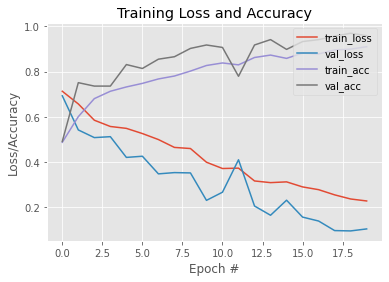

In [23]:
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
